# Project 6: Cancer Type Prediction Analysis

This notebook focuses on understanding and comparing the performance of different machine learning models for predicting cancer types. We'll be analyzing Support Vector Machines (SVM), Random Forest (RF), and Neural Network (NN) regression. We'll start with importing the necessary libraries and loading the dataset.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading the Dataset
We'll load the dataset and check its contents.

In [5]:
data = pd.read_csv('breast cancer (1).csv')

data.drop(data.columns[-1], axis=1, inplace=True)

target = data.columns[1]
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Step 2: Data Preprocessing

In this step, we will:
1. Split the dataset into training and testing sets.
2. Scale the features to standardize the range of independent variables.

These steps help to ensure that our machine learning models are trained efficiently and effectively.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Step 3: Support Vector Machine (SVM) Analysis

In this step, we will:
1. Train a Support Vector Machine (SVM) model for cancer type prediction.
2. Evaluate the model using different kernels to see how they affect performance.

In [15]:
results = {}

# function to evaluate and store SVM results
def evaluate_svm(kernel, degree=None):
    if kernel == 'poly' and degree is not None:
        svm_model = SVC(kernel=kernel, degree=degree, random_state=42)
        description = f'SVM ({kernel.capitalize()} Kernel, Degree={degree})'
    else:
        svm_model = SVC(kernel=kernel, random_state=42)
        description = f'SVM ({kernel.capitalize()} Kernel)'
    svm_model.fit(X_train_scaled, y_train)
    svm_predictions = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, svm_predictions)
    results[description] = accuracy
    print(f"{description} Classification Report:\n", classification_report(y_test, svm_predictions))
    print(f"{description} Accuracy Score:", accuracy)

### Training the SVM Model

In [18]:
# evaluating SVM with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    if kernel == 'poly':
        for degree in [2, 3, 4]:
            evaluate_svm(kernel, degree)
    else:
        evaluate_svm(kernel)

SVM (Linear Kernel) Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.96      0.96        71
           M       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

SVM (Linear Kernel) Accuracy Score: 0.956140350877193
SVM (Poly Kernel, Degree=2) Classification Report:
               precision    recall  f1-score   support

           B       0.77      0.99      0.86        71
           M       0.96      0.51      0.67        43

    accuracy                           0.81       114
   macro avg       0.86      0.75      0.77       114
weighted avg       0.84      0.81      0.79       114

SVM (Poly Kernel, Degree=2) Accuracy Score: 0.8070175438596491
SVM (Poly Kernel, Degree=3) Classification Report:
               precision    recall  f1-score   support

           B       0.83   

## Step 4: Random Forest Analysis

In this step, we will:
1. Train a Random Forest model for cancer type prediction.
2. Evaluate the performance of the Random Forest model.
3. Calculate evaluation metrics (accuracy, precision, recall, and F1-score).
4. Store the results for comparison with other models.

In [28]:
# training a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# making predictions with the random forest model
rf_predictions = rf_model.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, pos_label='M')
rf_recall = recall_score(y_test, rf_predictions, pos_label='M')
rf_f1_score = f1_score(y_test, rf_predictions, pos_label='M')

results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1_score': rf_f1_score
}

print(f"Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))
print(f"Random Forest Accuracy Score:", rf_accuracy)

Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Random Forest Accuracy Score: 0.9649122807017544


## Step 5: Neural Network Regression Analysis

In this step, we will:
1. Train a Neural Network model for cancer type prediction.
2. Use grid search to optimize hyperparameters.
3. Evaluate the performance of the Neural Network model.
4. Calculate evaluation metrics (accuracy, precision, recall, and F1-score).
5. Store the results for comparison with other models.

In [35]:
# defining the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# initialising the MLPClassifier
mlp = MLPClassifier(max_iter=100)

# initialising GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=3)

# fitting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# getting the best parameters and estimator
best_params = grid_search.best_params_
best_mlp = grid_search.best_estimator_

# making predictions with the best estimator
nn_predictions = best_mlp.predict(X_test_scaled)

nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions, pos_label='M')
nn_recall = recall_score(y_test, nn_predictions, pos_label='M')
nn_f1_score = f1_score(y_test, nn_predictions, pos_label='M')

results['Neural Network'] = {
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1_score
}

print(f"Neural Network Classification Report:\n", classification_report(y_test, nn_predictions))
print(f"Neural Network Accuracy Score:", nn_accuracy)
print(f"Best Parameters for Neural Network: {best_params}")

Neural Network Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Neural Network Accuracy Score: 0.9736842105263158
Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 6: Summary and Visualization

In this final step, we will:
1. Summarize the results of the SVM, Random Forest, and Neural Network models.
2. Visualize the performance metrics for each model to understand their strengths and weaknesses.

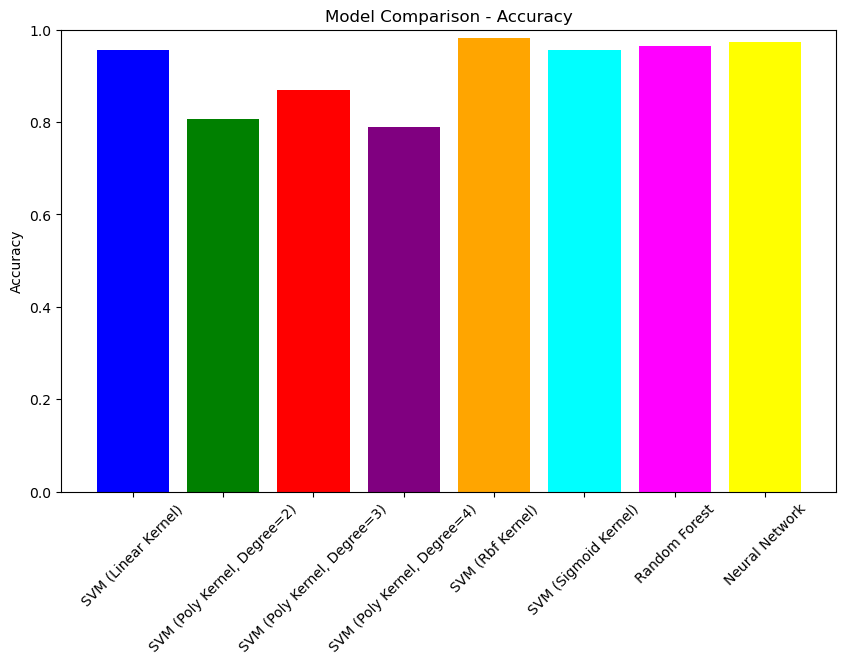

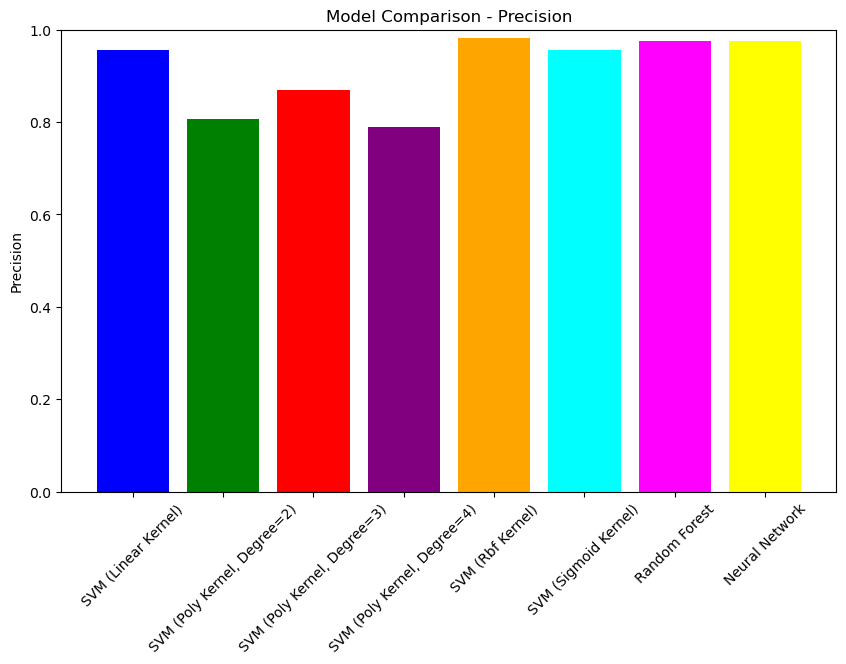

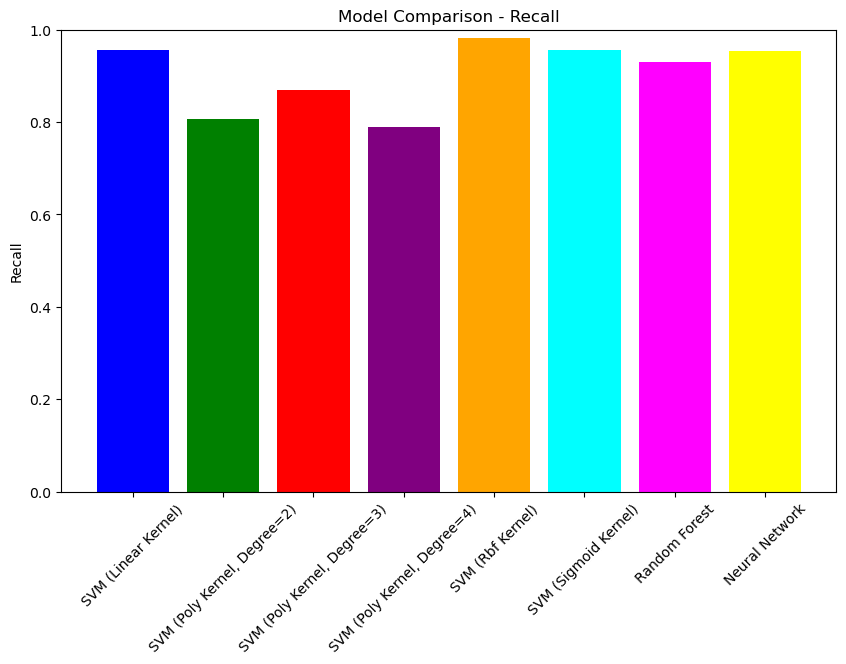

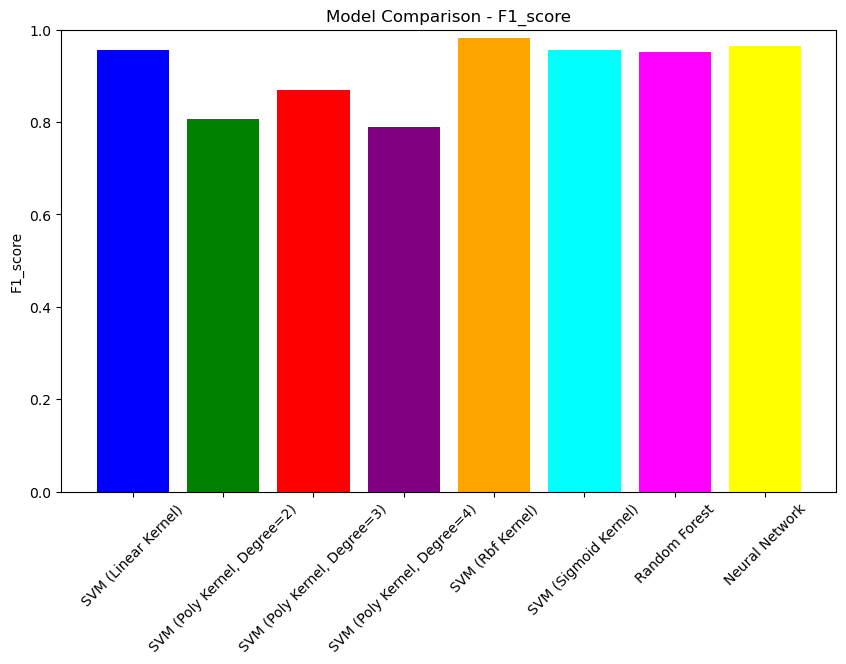

In [38]:
results_df = pd.DataFrame(results).T

# plotting the accuracy scores for each model
plt.figure(figsize=(10, 6))
plt.bar(results_df.index, results_df['accuracy'], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# plotting precision, recall, and f1-score
metrics = ['precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df.index, results_df[metric], color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.ylabel(metric.capitalize())
    plt.title(f'Model Comparison - {metric.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

### Best Model for Each Metric

We will identify the models that performed the best for each metric (accuracy, precision, recall, and F1-score).

In [41]:
best_accuracy_models = results_df[results_df['accuracy'] == results_df['accuracy'].max()]
best_precision_models = results_df[results_df['precision'] == results_df['precision'].max()]
best_recall_models = results_df[results_df['recall'] == results_df['recall'].max()]
best_f1_score_models = results_df[results_df['f1_score'] == results_df['f1_score'].max()]

print("Best Models for Accuracy:")
print(best_accuracy_models[['accuracy']])
print("\nBest Models for Precision:")
print(best_precision_models[['precision']])
print("\nBest Models for Recall:")
print(best_recall_models[['recall']])
print("\nBest Models for F1 Score:")
print(best_f1_score_models[['f1_score']])

Best Models for Accuracy:
                  accuracy
SVM (Rbf Kernel)  0.982456

Best Models for Precision:
                  precision
SVM (Rbf Kernel)   0.982456

Best Models for Recall:
                    recall
SVM (Rbf Kernel)  0.982456

Best Models for F1 Score:
                  f1_score
SVM (Rbf Kernel)  0.982456
